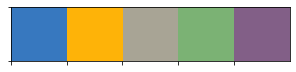

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
import seaborn as sns
#plt.rcParams['axes.facecolor']='lightsteelblue'
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] 
#plt.rc('lines',linewidth=1,linestyle='solid')
#plt.rc('font',size=18)
#plt.rc('grid',color='w')
#mpl.rcParams['axes.grid'] = True
#mpl.rcParams["axes.edgecolor"] = 'w'
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.set(color_codes=True)
start = datetime.datetime(2015,1,1)
finish = datetime.datetime.now()

In [2]:
#Einzelwert
apple       = web.DataReader('AAPL','yahoo',start,finish)
wirecard    = web.DataReader('WDI.DE','yahoo',start,finish)
amzn        = web.DataReader('AMZN','yahoo',start,finish)
ibm         = web.DataReader('IBM','yahoo',start,finish)
tmv         = web.DataReader('TMV.DE','yahoo',start,finish)
cisco       = web.DataReader('CSCO','yahoo',start,finish)
rwe         = web.DataReader('RWE.DE','yahoo',start,finish)
applied_mat = web.DataReader('AMAT','yahoo',start,finish)
AMD         = web.DataReader('AMD','yahoo',start,finish)
hapaq       = web.DataReader('HLAG.DE','yahoo',start,finish)
toyota      = web.DataReader('TM','yahoo',start,finish)
eckert      = web.DataReader('EUZ.DE','yahoo',start,finish)
umicore     = web.DataReader('UMI.BR','yahoo',start,finish)


In [3]:
# Indices
dax = web.DataReader('^GDAXI','yahoo',start,finish)
volatility_index = web.DataReader('^VIX','yahoo',start,finish)
banken_index = web.DataReader('^STOXX','yahoo',start,finish)
dow_jones_utility = web.DataReader('^DJU','yahoo',start,finish)
nasdaq = web.DataReader('^IXIC','yahoo',start,finish)

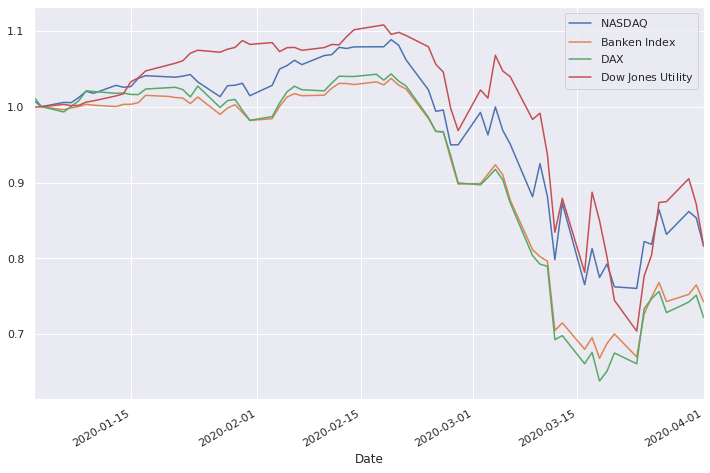

In [4]:
nasdaq['norm']=nasdaq['Close']['2020-01-01':]/nasdaq['Close']['2020-01-03']
banken_index['norm']=banken_index['Close']['2020-01-01':]/banken_index['Close']['2020-01-03']
dax['norm']=dax['Close']['2020-01-01':]/dax['Close']['2020-01-03']
dow_jones_utility['norm']=dow_jones_utility['Close']['2020-01-01':]/dow_jones_utility['Close']['2020-01-03']
nasdaq['norm']['2020-01-01':].plot(label='$\mathrm{NASDAQ}$',figsize=(12,8))
banken_index['norm']['2020-01-01':].plot(label='$\mathrm{Banken\; Index}$',figsize=(12,8))
dax['norm']['2020-01-01':].plot(label='$\mathrm{DAX}$',figsize=(12,8))
dow_jones_utility['norm']['2020-01-01':].plot(label='$\mathrm{Dow\; Jones\; Utility}$',figsize=(12,8))

plt.legend();

# relative Stärke

In [5]:
rel_st =[]
for stock_df in (apple,wirecard,amzn,ibm,tmv ,cisco,rwe,applied_mat,AMD,hapaq,toyota,eckert,umicore):
    stock_df['relative Stärke'] = stock_df['Close'].rolling(456).mean()
    stock_df['relative Stärke'] = stock_df['Close']*100/stock_df['relative Stärke']
    rel_st =  np.append(rel_st,stock_df['relative Stärke'][-1])

In [6]:
all_pos_rel = [apple['relative Stärke'],
                wirecard['relative Stärke'],
                amzn['relative Stärke'],
                ibm['relative Stärke'],
                cisco['relative Stärke'],
                rwe['relative Stärke'],
                applied_mat['relative Stärke'],
                AMD['relative Stärke'],
                toyota['relative Stärke'],
                eckert['relative Stärke'],
                umicore['relative Stärke']]
relative_staerke = pd.concat(all_pos_rel,axis = 1)
relative_staerke.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']
relative_staerke.tail()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore
Date,,,,,,,,,,,
2020-03-26,119.183315,72.848002,108.653800,82.725558,84.538426,101.606712,107.063914,160.746887,98.895498,139.098783,85.324716
2020-03-27,114.186003,71.570769,105.549934,79.209564,80.889819,98.008317,98.069898,157.263156,99.610630,129.609453,81.869397
2020-03-30,117.372471,71.816537,109.061147,82.844668,84.030520,97.843666,102.993666,161.200488,98.047695,135.448108,80.236242
2020-03-31,117.061012,75.245414,108.236608,81.422581,81.941846,101.482560,99.796909,152.838910,93.947881,136.294197,83.300594
2020-04-01,110.846539,71.305335,105.875077,77.223687,79.917848,95.690867,94.343669,146.416111,91.440859,127.446675,82.104094


# Normalize

In [7]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']
    
    

# Allocation

In [8]:
for stock_df , allo in list(zip((apple,
                                 wirecard,
                                 amzn,
                                 ibm,
                                 cisco,
                                 rwe,
                                 applied_mat,
                                 AMD,
                                 toyota,
                                 eckert,
                                 umicore),
                                [.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07,.07])):
    stock_df['Allocation'] = stock_df['Normed Return']*allo


# Value

In [9]:
for stock_df in (apple,wirecard,amzn,ibm,cisco,rwe,applied_mat,AMD,toyota,eckert,umicore):
    stock_df['Position Values'] = stock_df['Allocation']*25000

In [10]:
all_pos_vals = [apple['Position Values'],
                wirecard['Position Values'],
                amzn['Position Values'],
                ibm['Position Values'],
                cisco['Position Values'],
                rwe['Position Values'],
                applied_mat['Position Values'],
                AMD['Position Values'],
                toyota['Position Values'],
                eckert['Position Values'],
                umicore['Position Values']]
portfolio_val = pd.concat(all_pos_vals,axis = 1)

In [11]:
portfolio_val.columns = ['Apple',
                         'Wirecard',
                         'Amazon',
                         'IBM',
                         'Cisco',
                         'RWE',
                         'Applied Materials',
                         'Advanced Micro',
                         'Toyota',
                         'Eckert und Ziegler',
                         'Umicore']

In [12]:

portfolio_val['Total Pos Sum'] = portfolio_val.sum(axis=1)
portfolio_dropna=portfolio_val.dropna()

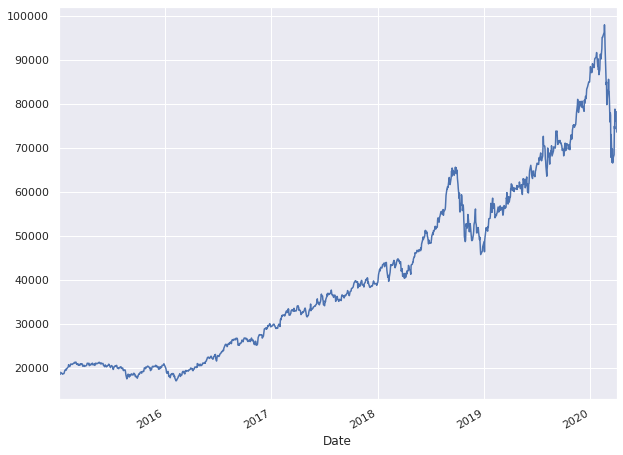

In [13]:
portfolio_dropna['Total Pos Sum'][::].plot(figsize=(10,8))


In [14]:
portfolio_val['Total Pos Sum'].argmin()

/home/dominik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2015-05-25 00:00:00')

In [15]:
print(portfolio_val['Total Pos Sum']['2015-05-25'])

2406.1831101387447


In [16]:
wirecard['Normed Return']

Date
2015-01-02    1.000000
2015-01-05    0.992919
2015-01-06    0.982088
2015-01-07    0.995140
2015-01-08    1.037212
                ...   
2020-03-26    2.818662
2020-03-27    2.767565
2020-03-30    2.775340
2020-03-31    2.906137
2020-04-01    2.752013
Name: Normed Return, Length: 1332, dtype: float64

In [17]:
portfolio_val.dropna()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore,Total Pos Sum
Date,,,,,,,,,,,,
2015-01-02,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,19250.000000
2015-01-05,1700.699688,1737.607742,1714.094785,1722.463869,1715.139370,1670.609362,1693.910308,1743.445699,1717.971735,1754.154584,1728.064820,18898.161962
2015-01-06,1700.859788,1718.654702,1674.956351,1685.317271,1714.505528,1656.298677,1630.108233,1723.782797,1700.286468,1560.274305,1721.377262,18486.421382
2015-01-07,1724.709566,1741.495455,1692.710496,1674.302786,1730.351235,1642.669342,1645.532865,1691.011138,1743.037320,1587.971588,1708.804723,18582.596513
2015-01-08,1790.976819,1815.120810,1704.281744,1710.693576,1743.661693,1678.105510,1698.117001,1710.674040,1776.597489,1606.436268,1739.834986,18974.499936
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,4136.741944,4932.657825,11092.012203,1219.039256,2572.075394,1632.788080,3449.519411,31132.957912,1759.329966,13368.504688,3502.140067,78797.766746
2020-03-27,3965.471530,4843.238393,10777.826642,1166.558686,2460.521476,1575.545210,3158.553748,30529.962875,1771.862811,12482.194440,3356.618955,76088.354767
2020-03-30,4078.637961,4856.845666,11139.999147,1219.471205,2555.595723,1573.500771,3316.306158,31368.913361,1743.733630,13073.068408,3285.998160,78212.070190


In [18]:
stocks = pd.concat([apple['Close'],
                    wirecard['Close'],
                    amzn['Close'],
                    ibm['Close'],
                    cisco['Close'],
                    rwe['Close'],
                    applied_mat['Close'],
                    AMD['Close'],
                    toyota['Close'],
                    eckert['Close'],
                    umicore['Close'],
                    tmv['Close'],
                    hapaq['Close']],axis=1)
stocks.columns = ['Apple',
                  'Wirecard',
                  'Amazon',
                  'IBM',
                  'Cisco',
                  'RWE',
                  'Applied Materials',
                  'Advanced Micro',
                  'Toyota',
                  'Eckert und Ziegler',
                  'Umicore',
                  'Teamviewer',
                  'Hapaq Loyd']

In [19]:
stocks.pct_change(1).mean()

Apple                 0.000738
Wirecard              0.001146
Amazon                0.001520
IBM                  -0.000206
Cisco                 0.000374
RWE                   0.000179
Applied Materials     0.000678
Advanced Micro        0.002853
Toyota                0.000023
Eckert und Ziegler    0.001724
Umicore               0.000678
Teamviewer            0.003469
Hapaq Loyd            0.001407
dtype: float64

In [20]:
stocks.pct_change(1).corr()

,Apple,Wirecard,Amazon,IBM,Cisco,RWE,Applied Materials,Advanced Micro,Toyota,Eckert und Ziegler,Umicore,Teamviewer,Hapaq Loyd
Apple,1.000000,0.206446,0.523008,0.517386,0.610102,0.182934,0.590337,0.349412,0.480492,0.135168,0.282722,0.249700,0.172906
Wirecard,0.206446,1.000000,0.202150,0.195595,0.222732,0.228984,0.163966,0.129732,0.202161,0.242645,0.272126,0.260513,0.226870
Amazon,0.523008,0.202150,1.000000,0.405604,0.484704,0.180485,0.426310,0.311040,0.384460,0.128801,0.250413,0.228724,0.131438
IBM,0.517386,0.195595,0.405604,1.000000,0.590072,0.287504,0.508242,0.316749,0.501735,0.171984,0.230482,0.214603,0.166770
Cisco,0.610102,0.222732,0.484704,0.590072,1.000000,0.217111,0.533757,0.335090,0.489626,0.146870,0.293670,0.270206,0.134821
RWE,0.182934,0.228984,0.180485,0.287504,0.217111,1.000000,0.229654,0.162171,0.294756,0.161254,0.239882,0.305371,0.157293
Applied Materials,0.590337,0.163966,0.426310,0.508242,0.533757,0.229654,1.000000,0.424810,0.466833,0.193787,0.239876,0.198242,0.155024
Advanced Micro,0.349412,0.129732,0.311040,0.316749,0.335090,0.162171,0.424810,1.000000,0.298804,0.161655,0.211494,0.237049,0.120363
Toyota,0.480492,0.202161,0.384460,0.501735,0.489626,0.294756,0.466833,0.298804,1.000000,0.134782,0.284169,0.162139,0.147146
Eckert und Ziegler,0.135168,0.242645,0.128801,0.171984,0.146870,0.161254,0.193787,0.161655,0.134782,1.000000,0.149359,0.215281,0.114076


In [21]:
log_return = np.log(stocks/stocks.shift(1))

In [22]:
#log_return.hist(bins=100,figsize=(30,16))
#plt.tight_layout

In [23]:
from pandas.plotting import scatter_matrix
#scatter_matrix(stocks,figsize=(30,30),alpha=0.2,hist_kwds={'bins':50});

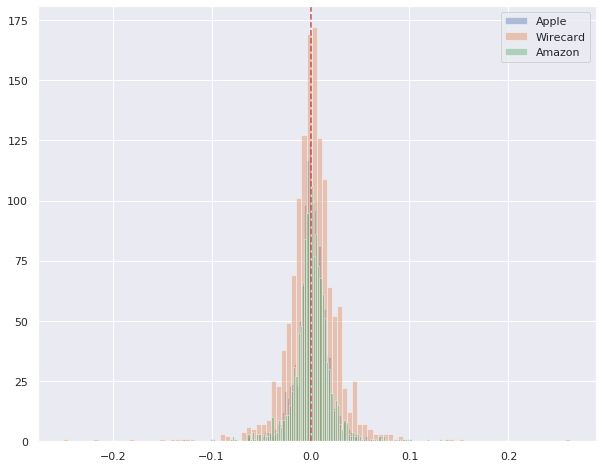

In [24]:


apple['Close'].pct_change(1).hist(bins=100,label='Apple',figsize=(10,8),alpha=0.4)
wirecard['Close'].pct_change(1).hist(bins=100,label='Wirecard',figsize=(10,8),alpha=0.4)
amzn['Close'].pct_change(1).hist(bins=100,label='Amazon',figsize=(10,8),alpha=0.4)
plt.axvline(0.0, c='r', ls='--')
plt.legend()

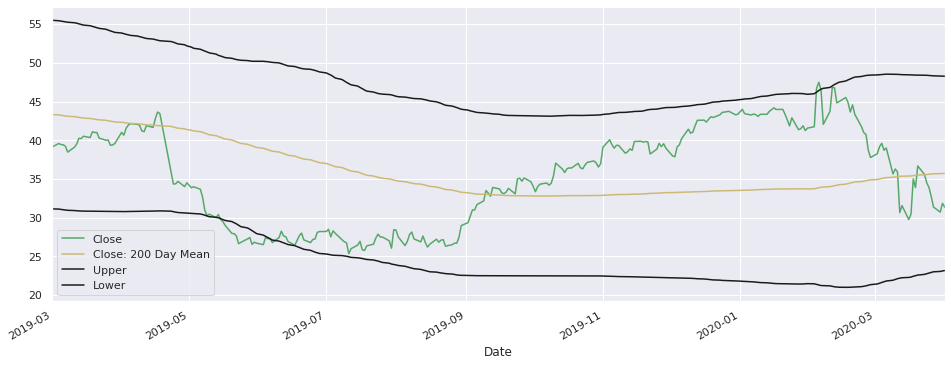

In [25]:
# Close 20 MA
umicore['Close: 200 Day Mean'] = umicore['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
umicore['Upper'] = umicore['Close: 200 Day Mean']+2*(umicore['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
umicore['Lower'] = umicore['Close: 200 Day Mean']-2*(umicore['Close'].rolling(200).std())
# Close
umicore[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-03-01':].plot(figsize=(16,6),color=['g','y','k','k'])
